In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=100
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [104]:
dt=pd.read_csv(r'C:\Users\nikosp\Desktop\Big_Blue_BootCAMP\Part_Time_BootCamp\Dataset_German_Credit\SouthGermanCredit.csv', sep=';')

In [10]:
dt

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [13]:
dt.describe(include='all')

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


C:\Users\nikosp\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kredit', ylabel='count'>

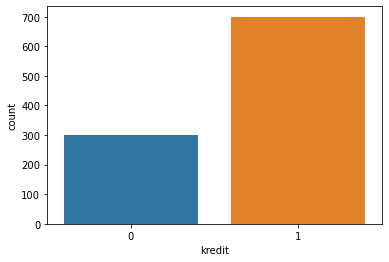

In [15]:
sns.countplot(dt.kredit)

In [16]:
dt.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


In [144]:
dt1=dt[['laufkont', 'moral','beszeit','rate','famges','weitkred','wohn','laufzeit','kredit']]

In [145]:
dt1.head()

,laufkont,moral,beszeit,rate,famges,weitkred,wohn,laufzeit,kredit
0,1,4,2,4,2,3,1,18,1
1,1,4,3,2,3,3,1,9,1
2,2,2,4,2,2,3,1,12,1
3,1,4,3,3,3,3,1,12,1
4,1,4,3,4,3,1,2,12,1


In [146]:
dt2=pd.get_dummies(dt1,columns=['famges','weitkred','wohn'])

In [147]:
dt2.head()

,laufkont,moral,beszeit,rate,laufzeit,kredit,famges_1,famges_2,famges_3,famges_4,weitkred_1,weitkred_2,weitkred_3,wohn_1,wohn_2,wohn_3
0,1,4,2,4,18,1,0,1,0,0,0,0,1,1,0,0
1,1,4,3,2,9,1,0,0,1,0,0,0,1,1,0,0
2,2,2,4,2,12,1,0,1,0,0,0,0,1,1,0,0
3,1,4,3,3,12,1,0,0,1,0,0,0,1,1,0,0
4,1,4,3,4,12,1,0,0,1,0,1,0,0,0,1,0


In [109]:
X=dt2.drop('kredit',1)
y=dt2['kredit']

C:\Users\nikosp\AppData\Local\Temp\ipykernel_18016\3837028222.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=dt2.drop('kredit',1)


In [110]:
X.head()

,laufkont,moral,beszeit,rate,laufzeit,famges_1,famges_2,famges_3,famges_4,weitkred_1,weitkred_2,weitkred_3,wohn_1,wohn_2,wohn_3
0,1,4,2,4,18,0,1,0,0,0,0,1,1,0,0
1,1,4,3,2,9,0,0,1,0,0,0,1,1,0,0
2,2,2,4,2,12,0,1,0,0,0,0,1,1,0,0
3,1,4,3,3,12,0,0,1,0,0,0,1,1,0,0
4,1,4,3,4,12,0,0,1,0,1,0,0,0,1,0


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: kredit, dtype: int64

In [33]:
y.value_counts()

1    700
0    300
Name: kredit, dtype: int64

# Simple logistic regression

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69, shuffle=True)

In [35]:
lr1=LogisticRegression()

In [36]:
lr1_mod=lr1.fit(X_train, y_train)

C:\Users\nikosp\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
y_pred1=lr1.predict(X_test)

In [39]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.62      0.34      0.44        77
           1       0.75      0.91      0.82       173

    accuracy                           0.73       250
   macro avg       0.69      0.62      0.63       250
weighted avg       0.71      0.73      0.70       250



In [43]:
balanced_accuracy_score(y_test, y_pred1)

0.6225883942646948

### Logistic Regression with balancing

<AxesSubplot:xlabel='kredit', ylabel='count'>

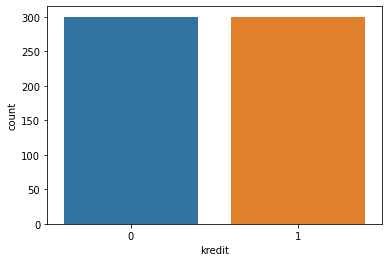

In [46]:
dt3 = (dt2.groupby('kredit', as_index=False)
        .apply(lambda x: x.sample(n=300))
        .reset_index(drop=True))

sns.countplot(x=dt3['kredit'])

In [47]:
X_bal = dt3.drop('kredit', axis=1)

y_bal = dt3['kredit']

X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(
    X_bal, y_bal, test_size=0.25, random_state=69, shuffle=True)

In [50]:
lr2_mod=lr1.fit(X_bal_train, y_bal_train)

In [51]:
y_pred2=lr2_mod.predict(X_bal_test)

In [52]:
print(classification_report(y_bal_test,y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        78
           1       0.72      0.72      0.72        72

    accuracy                           0.73       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.73      0.73      0.73       150



In [53]:
balanced_accuracy_score(y_bal_test, y_pred2)

0.732905982905983

### Second way to balance: Stratified

In [56]:
X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=69,
    shuffle=True,
    stratify=y)


lr3_mod = lr1.fit(X_train_str, y_train_str)

C:\Users\nikosp\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
y_pred3=lr3_mod.predict(X_test_str)

In [60]:
print(classification_report(y_test_str,y_pred3))

              precision    recall  f1-score   support

           0       0.74      0.43      0.54        75
           1       0.79      0.94      0.86       175

    accuracy                           0.78       250
   macro avg       0.77      0.68      0.70       250
weighted avg       0.78      0.78      0.76       250



In [61]:
balanced_accuracy_score(y_test_str, y_pred3)

0.6819047619047619

In [62]:
# From logistic regressions better the No2 balanced

# Support Vector Machines _ SVM

In [148]:
#New Data
#dtF=pd.get_dummies(dt1,columns=['laufkont', 'moral','beszeit','rate','famges','weitkred','wohn'])
#X=dtF.drop('kredit',1)
#y=dtF['kredit']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

#Raw data-balanced
RF = SVC(class_weight='balanced')

class_RF1= RF.fit(X_train, y_train)
y_pred4 = class_RF1.predict(X_test)

In [149]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.43      0.58      0.49        77
           1       0.78      0.65      0.71       173

    accuracy                           0.63       250
   macro avg       0.60      0.62      0.60       250
weighted avg       0.67      0.63      0.64       250



In [150]:
balanced_accuracy_score(y_test, y_pred4)

0.6187973875835147

In [68]:
# Not impressive!

In [151]:
#One hot encoding all categorical

In [152]:
#New Data
dtF=pd.get_dummies(dt1,columns=['laufkont', 'moral','beszeit','rate','famges','weitkred','wohn'])
X2=dtF.drop('kredit',1)
y2=dtF['kredit']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=69)

#Raw data-balanced
RF = SVC(class_weight='balanced')

class_RF1= RF.fit(X_train2, y_train2)
y_pred4 = class_RF1.predict(X_test2)

C:\Users\nikosp\AppData\Local\Temp\ipykernel_18016\2912119780.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X2=dtF.drop('kredit',1)


In [153]:
print(classification_report(y_test,y_pred4))
print(balanced_accuracy_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.43      0.58      0.49        77
           1       0.78      0.65      0.71       173

    accuracy                           0.63       250
   macro avg       0.60      0.62      0.60       250
weighted avg       0.67      0.63      0.64       250

0.6187973875835147


In [114]:
# Balanced data

class_RF2 = RF.fit(X_bal_train, y_bal_train)
y_pred5 = class_RF2.predict(X_bal_test)
print(classification_report(y_bal_test,y_pred5))
print(balanced_accuracy_score(y_bal_test, y_pred5))

              precision    recall  f1-score   support

           0       0.65      0.60      0.63        78
           1       0.60      0.65      0.63        72

    accuracy                           0.63       150
   macro avg       0.63      0.63      0.63       150
weighted avg       0.63      0.63      0.63       150

0.6276709401709402


In [75]:
#Same !

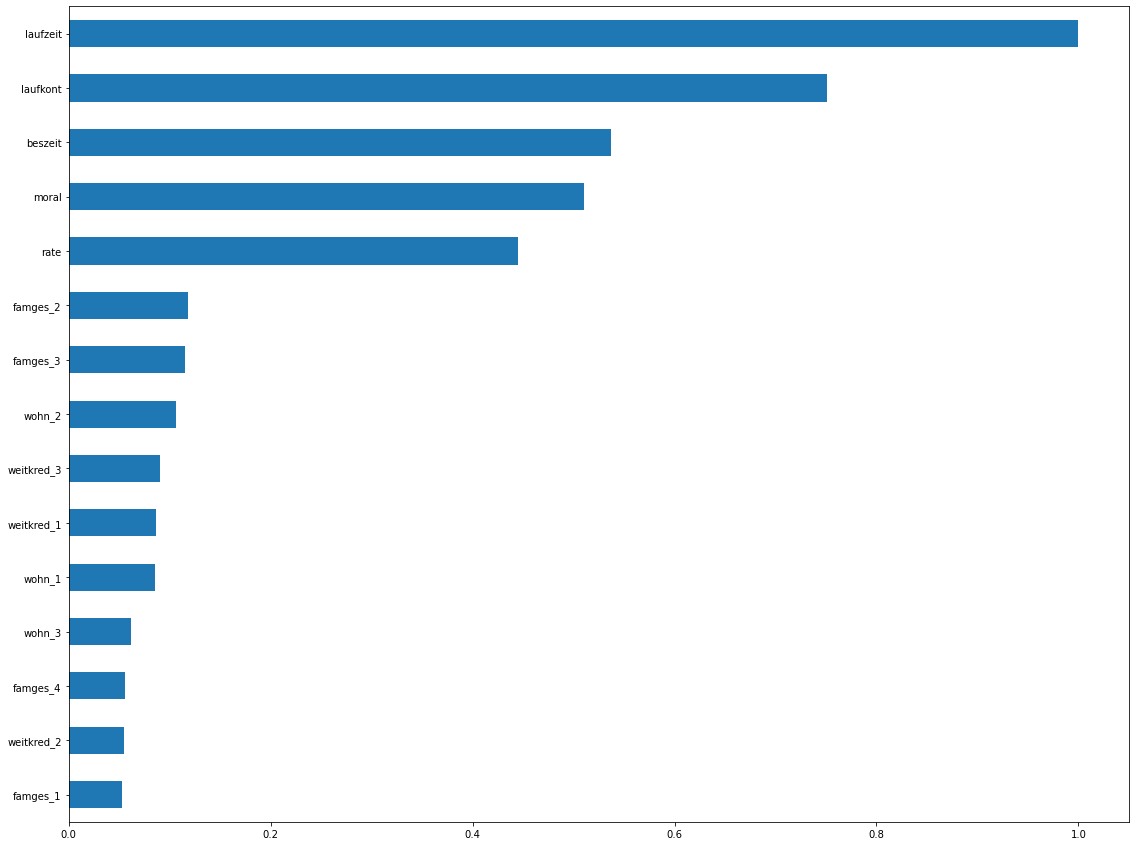

In [115]:
importance = pd.Series(RF.feature_importances_, index=list(X))
importance = importance/importance.max()
importance = importance.sort_values(ascending=False)
importance.sort_values().plot.barh(figsize=(19,15))
plt.show()

#  Gradient-Boost, Ada-Boost and XGBoost

In [116]:
estimators = [GradientBoostingClassifier(),
              AdaBoostClassifier(),
              xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')]
metrics = {}
for estimator in estimators:
    
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test)
   
    metrics[str(estimator).split('(')[0]] = {
        'balanced accuracy':round(balanced_accuracy_score(y_test, predictions),2),
        'macro f1':round(f1_score(y_test, predictions, average='macro'),2),
        
        }


C:\Users\nikosp\miniconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [117]:
metrics = pd.DataFrame(metrics)
metrics

,GradientBoostingClassifier,AdaBoostClassifier,XGBClassifier
balanced accuracy,0.59,0.61,0.55
macro f1,0.59,0.62,0.55


# All together

In [154]:
#With raw data
estimators = [LogisticRegression(),
              SVC(class_weight='balanced'),
              GradientBoostingClassifier(),
              AdaBoostClassifier(),
              xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')]
metrics = {}
for estimator in estimators:
    
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test)
   
    metrics[str(estimator).split('(')[0]] = {
        'balanced accuracy':round(balanced_accuracy_score(y_test, predictions),2),
        'macro f1':round(f1_score(y_test, predictions, average='macro'),2),
        
        }
metrics = pd.DataFrame(metrics)
metrics

C:\Users\nikosp\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nikosp\miniconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,LogisticRegression,SVC,GradientBoostingClassifier,AdaBoostClassifier,XGBClassifier
balanced accuracy,0.63,0.62,0.59,0.61,0.55
macro f1,0.63,0.60,0.59,0.62,0.55


In [90]:
#With balanced Data

In [155]:
estimators = [LogisticRegression(),
              SVC(),
              GradientBoostingClassifier(),
              AdaBoostClassifier(),
              xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')]
metrics = {}
for estimator in estimators:
    
    estimator.fit(X_bal_train, y_bal_train)
    predictions = estimator.predict(X_bal_test)
   
    metrics[str(estimator).split('(')[0]] = {
        'balanced accuracy':round(balanced_accuracy_score(y_bal_test, predictions),2),
        'macro f1':round(f1_score(y_bal_test, predictions, average='macro'),2),
        
        }
    
metrics = pd.DataFrame(metrics)
metrics

C:\Users\nikosp\miniconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,LogisticRegression,SVC,GradientBoostingClassifier,AdaBoostClassifier,XGBClassifier
balanced accuracy,0.73,0.71,0.67,0.71,0.61
macro f1,0.73,0.71,0.67,0.71,0.61


# One should try standardizing (and parameter selection) 

In [ ]:
#Standardizing using balanced that proved better

In [159]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_bal_train)
X_test_sc = scaler.transform(X_bal_test)

In [160]:
estimators = [LogisticRegression(),
              SVC(),
              GradientBoostingClassifier(),
              AdaBoostClassifier(),
              xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')]
metrics = {}
for estimator in estimators:
    
    estimator.fit(X_train_sc, y_bal_train)
    predictions = estimator.predict(X_test_sc)
   
    metrics[str(estimator).split('(')[0]] = {
        'balanced accuracy':round(balanced_accuracy_score(y_bal_test, predictions),2),
        'macro f1':round(f1_score(y_bal_test, predictions, average='macro'),2),
        
        }
    
metrics = pd.DataFrame(metrics)
metrics

,LogisticRegression,SVC,GradientBoostingClassifier,AdaBoostClassifier,XGBClassifier
balanced accuracy,0.73,0.65,0.67,0.71,0.61
macro f1,0.73,0.65,0.67,0.71,0.61


In [161]:
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_bal_train)
X_test_sc = scaler.transform(X_bal_test)

In [162]:
estimators = [LogisticRegression(),
              SVC(),
              GradientBoostingClassifier(),
              AdaBoostClassifier(),
              xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')]
metrics = {}
for estimator in estimators:
    
    estimator.fit(X_train_sc, y_bal_train)
    predictions = estimator.predict(X_test_sc)
   
    metrics[str(estimator).split('(')[0]] = {
        'balanced accuracy':round(balanced_accuracy_score(y_bal_test, predictions),2),
        'macro f1':round(f1_score(y_bal_test, predictions, average='macro'),2),
        
        }
    
metrics = pd.DataFrame(metrics)
metrics

,LogisticRegression,SVC,GradientBoostingClassifier,AdaBoostClassifier,XGBClassifier
balanced accuracy,0.72,0.7,0.67,0.71,0.61
macro f1,0.72,0.7,0.67,0.71,0.61


In [ ]:
#Using the X2, y2 data for one hot in all variables

In [ ]:
#Upsampling with SMOTE

In [130]:
#Parameter selection SVC, Gradient Boosting and AdaBoosting